
# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>
>A person makes an doctor appoinment but doesnt show up! Why? What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 
>
>This dataset has information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.There are 14 variables in the dataset and 'No-Show' column  says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


##  Questions


>
>1.Which gender have appointments more and does gender matter?
>
>2.Does Show/No-show depend on patient's age?
>
>3.What is the relationship between No-show and SMS?
>
>4.What is the relationship between No-show and Scholarship? 
>
>5.Does Alcohol have impact on No-shows? 
>
>6.Does day of the week effect on no-show percentages?
>
>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime  as dt
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [85]:
# Loading data and printing out a few lines.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [86]:
df.shape

(110527, 14)

There are 110527 rows and 14 columns in the dataset

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can observe that there are no missing values in the data.

In [88]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [89]:
df.duplicated().sum() 

0

There are no duplicate values in the data.

### Data Cleaning 

In [90]:
#Dropping columns 'PatientId' and 'AppointmentID' as they are randomly generated by the system.
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [91]:
#renaming few columns:
df.rename(columns={'No-show':'no_show','hipertension':'hypertension','handcap':'handicap'},inplace=True)
#reanaming column names to lower case:
df.rename(columns=lambda x:x.lower(),inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [92]:
#changing data type of no_show from string to numeric
df['no_show'] = df['no_show'].apply(lambda x : 1 if x == 'Yes' else 0)
df.head(10)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,1
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0


Converting scheduledday and appointmentday from object to datetime:

In [93]:
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['scheduledday']=df['scheduledday'].dt.tz_localize(None)
df['appointmentday']=pd.to_datetime(df['appointmentday'])
df['appointmentday']=df['appointmentday'].dt.tz_localize(None)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


Adding 2 new columns to the data set : appointment_day and scheduled_day

Extracting the day of the week from appointmentday and scheduledday

In [94]:
df['appointment_day']=df['appointmentday'].dt.strftime('%A')
df['scheduled_day']=df['scheduledday'].dt.strftime('%A')
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_day,scheduled_day
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday


<a id='eda'></a>
## Exploratory Data Analysis

### 1.Which gender have appointments more and does gender matter?

In [95]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

We can observe that females have more appointments than men.

In [96]:
df.groupby('gender')['no_show'].mean()

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64

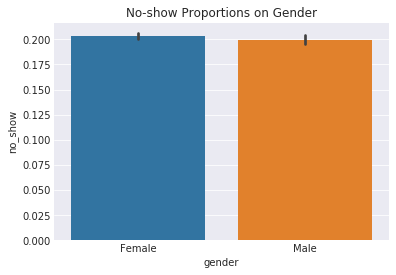

In [99]:
sns.barplot(x = df['gender'], y = df['no_show'])
plt.title('No-show Proportions on Gender')
plt.xticks([0,1],['Female','Male']);

Both females and males have equal No-show proportions,So with Gender feature we cannot predict whether the patient will showup for thier scheduled appointment or not.

### 2.Does Show/No-show depend on patient's age?

In [100]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

There are negatives values in Age.We need to remove that from our data

In [101]:
#removing age with negative values from dataset:
df.drop(df[df['age'] < 0].index, inplace = True)

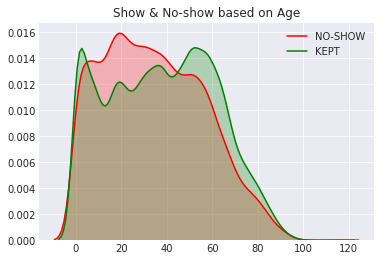

In [104]:
sns.kdeplot(df[df['no_show'] == 1]['age'], label = 'NO-SHOW',color='red',shade=True)
sns.kdeplot(df[df['no_show'] == 0]['age'], label = 'KEPT',color='green',shade=True);
plt.title('Show & No-show based on Age');

The distribution seems to be same for both show and no-show.So,we cannot predict whether the patient will showup for thier scheduled appointment or not.

### 3.What is the realtionship between Show/No-show and SMS?

In [105]:
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [106]:
df.groupby('sms_received')['no_show'].value_counts()

sms_received  no_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: no_show, dtype: int64

In [107]:
df.groupby('sms_received')['no_show'].mean()

sms_received
0    0.167035
1    0.275745
Name: no_show, dtype: float64

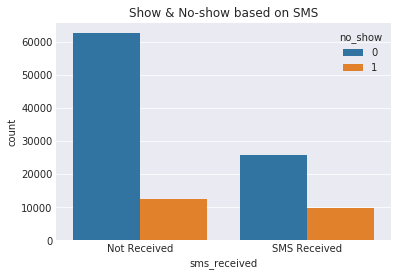

In [114]:
sns.countplot(x='sms_received',hue="no_show",data=df);
plt.xticks([0,1],['Not Received','SMS Received']);
plt.title('Show & No-show based on SMS');

([<matplotlib.axis.XTick at 0x7ff2dbcc4080>,
 <a list of 2 Text xticklabel objects>)

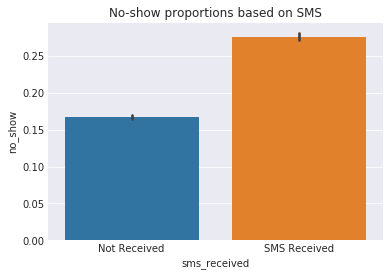

In [116]:
sns.barplot(x = df['sms_received'], y = df['no_show']) 
plt.title('No-show proportions based on SMS')
plt.xticks([0,1],['Not Received','SMS Received'])

From the above visualization,it is clear that 16% of the patients who didn't receive sms missed thier appointment,whereas 27% of the patients who received sms missed thier appointment.So,this feature helps us in predicting if a patient will show up or no-show to the appointment.

### 4.What is the relationship between Show/No-show and Scholarship? 

In [52]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [53]:
df.groupby('scholarship')['no_show'].mean()

scholarship
0    0.198074
1    0.237363
Name: no_show, dtype: float64

In [54]:
df.groupby('scholarship')['no_show'].value_counts()

scholarship  no_show
0            0          79924
             1          19741
1            0           8283
             1           2578
Name: no_show, dtype: int64

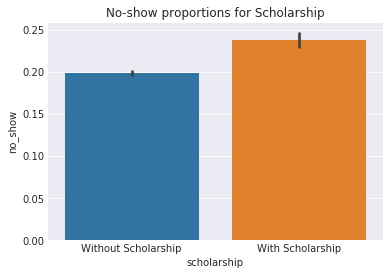

In [117]:
sns.barplot(x = df['scholarship'], y = df['no_show'])
plt.title('No-show proportions for Scholarship')
plt.xticks([0,1],['Without Scholarship','With Scholarship']);

People with scholarship tends to skip the appointment than people without scholarship.
Among the patients there are 10861 patients who have scholarship and among them 2578 missed thier schedules apppointment which is around 24 percent.From the patients who doesn't have scholarship,around 20 percent of them skip their appointment.

### 5.Does Alcohol have impact on No-shows? 

In [25]:
df.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

In [26]:
df.groupby('alcoholism')['no_show'].value_counts()

alcoholism  no_show
0           0          85524
            1          21642
1           0           2683
            1            677
Name: no_show, dtype: int64

In [27]:
df.groupby(df['alcoholism'])['no_show'].mean()

alcoholism
0    0.201948
1    0.201488
Name: no_show, dtype: float64

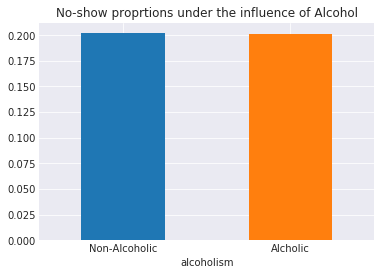

In [119]:
df.groupby('alcoholism')['no_show'].mean().plot(kind='bar');
plt.xticks([0,1],['Non-Alcoholic','Alcholic'],rotation=0);
plt.title('No-show proprtions under the influence of Alcohol');

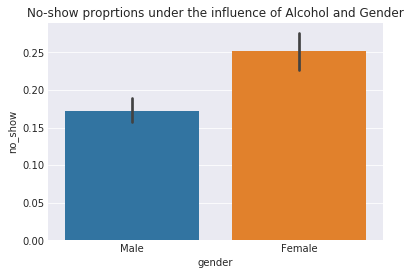

In [121]:
sns.barplot(data=df[df['alcoholism']==1],x='gender',y='no_show');
plt.xticks([0,1],['Male','Female']);
plt.title('No-show proprtions under the influence of Alcohol and Gender');

From the first plot, we can observe that there is no difference in the percentages of no-show whether the patient is alcholic or not.

The second plot visualizes the no show proportions with impact of alcohol based on gender.We can observe that females patients who are alcoholic tends to miss thier appointment than male patients.

### 6.Does day of the week effect on no-show percentages?

In [122]:
df['scheduled_day'].value_counts().sort_values(ascending=True)

Saturday        24
Thursday     18073
Friday       18915
Monday       23084
Wednesday    24262
Tuesday      26168
Name: scheduled_day, dtype: int64

In [123]:
df.groupby('scheduled_day')['no_show'].mean().sort_values(ascending=True)*100

scheduled_day
Saturday      4.166667
Monday       19.758274
Wednesday    20.109636
Tuesday      20.219352
Thursday     20.472528
Friday       20.549828
Name: no_show, dtype: float64

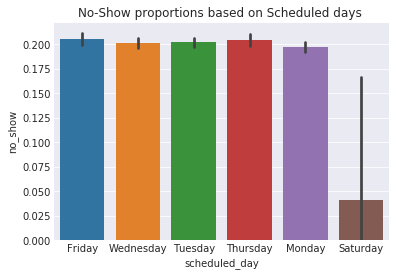

In [124]:
sns.barplot(data = df, x ='scheduled_day',y ='no_show');
plt.title('No-Show proportions based on Scheduled days ');

During weekday's, there is no much difference, but on saturday,only few patients have scheduled an appointment.No-show proportions are almost same except Saturday.

In [125]:
df['appointment_day'].value_counts().sort_values(ascending=True)

Saturday        39
Thursday     17247
Friday       19019
Monday       22714
Tuesday      25640
Wednesday    25867
Name: appointment_day, dtype: int64

In [126]:
df.groupby('appointment_day')['no_show'].mean().sort_values(ascending=True)*100

appointment_day
Thursday     19.354091
Wednesday    19.689179
Tuesday      20.093604
Monday       20.648058
Friday       21.226142
Saturday     23.076923
Name: no_show, dtype: float64

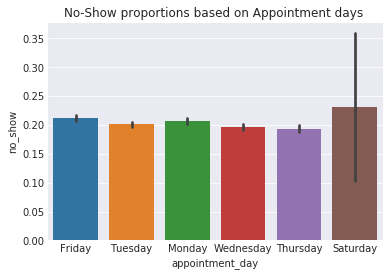

In [127]:
sns.barplot(data = df, x = 'appointment_day', y = 'no_show');
plt.title('No-Show proportions based on Appointment days ');

There is no much difference in the no-show percentages throught the week, but on saturday,only few patients have booked an appointment.Thursday is the lowest in no-show percentages.

<a id='conclusions'></a>
## Conclusions

### Summary

1. Gender has no impact on No-show appoinments.


2. Sms_Received helps us predicting if a patient will show up or no-show to the appointment.Patients who received sms have higher no-show percentages.


3. Patients enrolled in Brasilian welfare program Bolsa Família have higher No-show. 


4. There is no difference in the percentages of no-show whether the patient is alcholic or not.Female patients who are alcoholic tends to miss thier appointment than male patients.


5. All weekday's have equal no-show rates.

### Limitations

1. There are only few patient on Saturday,So we cannot properly analyse no-show percentages on saturday with weekdays.And,there are no appointments on Sundays.